In [1]:
# Pip install scimap

In [121]:
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)
import glob
from matplotlib import rcParams

rcParams['figure.dpi']=150

In [122]:
SAMPLE = 'TNP_pilot_cycif'
DATA_DIR = f'data/{SAMPLE}' 
SEG_METHOD = 'unmicst'


df = pd.read_csv(f'{DATA_DIR}/markers.csv')

if SAMPLE == 'PilotTonsil_5_z08':
    df = pd.read_csv(f'{DATA_DIR}/markers.csv', header=None)
    df.columns = ['marker_name']

# Create dictionaries to map between channel and index
chn2idx = {df.marker_name[i]:i for i in range(len(df))}
idx2chn = {i:df.marker_name[i] for i in range(len(df))}
df.marker_name



sc_csv = sorted(glob.glob(f'{DATA_DIR}/quantification/single_cell_*{SEG_METHOD}*'))
sc_csv

['data/TNP_pilot_cycif/quantification/single_cell_after_redsea_unmicst_TNP_pilot_cycif_subset.csv',
 'data/TNP_pilot_cycif/quantification/single_cell_before_redsea_unmicst_TNP_pilot_cycif_subset.csv']

In [123]:
df = pd.read_csv(sc_csv[0])
df = df.drop(columns=['Unnamed: 0'])


# Split the data into expression data and meta data
# Step-1 (Find the index of the column with name Area)
split='x_centroid'
split_idx = df.columns.get_loc(split)
meta = df[['x_centroid','y_centroid','cell_size']]

# Step-2 (select only the expression values)
df = df.iloc [:,:split_idx]      
markers = [m for m in df.columns if 'Hoech' not in m and 'cell_size' not in m]
df = df[markers]

# Create an anndata object
adata = ad.AnnData(df)
adata.obs = meta
adata.uns['all_markers'] = markers

markers

/home/whuan/anaconda3/envs/redsea/lib/python3.8/site-packages/anndata/utils.py:141: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
/home/whuan/anaconda3/envs/redsea/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


['CellID',
 'A488',
 'A555',
 'A647',
 'anti_NaKATPase',
 'anti_CD3',
 'anti_CD45RO',
 'Ki67',
 'Keratin',
 'aSMA',
 'CD8a',
 'CD4',
 'CD45',
 'CD20',
 'CD11c',
 'PD1',
 'CD68',
 'FOXP3',
 'PDL1',
 'CD163',
 'H3_PE',
 'CD31',
 'Ecad',
 'Vimentin',
 'Catenin',
 'LaminAC',
 'pH3',
 'H2ax']

In [124]:
df

CellID         A488        A555         A647  anti_NaKATPase  \
0          1  1952.000000  491.000000  1137.000000     2661.000000   
1          2  1873.000000  447.166667   975.500000     3895.500000   
2          3  1997.666667  402.333333  1184.666667     4391.666667   
3          4  1860.083333  428.666667   920.333333     3915.916667   
4          5  2159.000000  538.000000  1124.000000     7660.666667   
...      ...          ...         ...          ...             ...   
6385    6386  2250.000000  529.000000  1162.000000     4087.500000   
6386    6387  2377.500000  478.500000  1437.500000     5091.000000   
6387    6388  7347.000000  734.000000  2174.500000     8145.500000   
6388    6389  1782.500000  489.000000  1060.500000     6221.500000   
6389    6390  1901.666667  474.000000  1163.333333     3056.333333   

         anti_CD3   anti_CD45RO         Ki67     Keratin         aSMA  ...  \
0        0.000000   2852.000000  2427.000000  294.000000  7550.000000  ...   
1        0.000000   5269.166667  2728.083333  257.416667  1111.583333  ...   
2        0.000000   7330.000000  2828.333333  266.666667   977.666667  ...   
3        0.000000   5129.500000  2736.583333  281.666667   938.583333  ...   
4        0.000000  25428.666667  5646.000000  318.000000  1343.333333  ...   
...           ...           ...          ...         ...          ...  ...   
6385   169.437500   1694.500000  2716.000000  415.500000   679.000000  ...   
6386  1045.500000   1620.500000  2790.000000  390.000000   736.000000  ...   
6387     0.000000   2005.000000  4308.000000  409.000000   746.000000  ...   
6388  5966.227368  20233.000000  3187.000000  430.000000  1454.000000  ...   
6389     0.000000   2587.333333  2707.333333  334.333333   808.000000  ...   

             PDL1       CD163         H3_PE         CD31         Ecad  \
0     1397.000000    0.000000   8260.000000  2379.000000   924.000000   
1     1488.166667  280.183894  20740.583333  2051.916667  1021.333333   
2     1894.333333    0.000000  12838.333333  2079.000000  1021.000000   
3     1390.416667    0.000000  21207.833333  2021.000000   868.916667   
4     1523.000000    0.000000   4886.666667  1697.666667  1186.000000   
...           ...         ...           ...          ...          ...   
6385  2002.000000    0.000000   3101.500000  1025.500000   831.500000   
6386  2557.500000  946.500000   3402.000000  1200.500000   773.500000   
6387  2469.000000    0.000000   7794.000000  2644.000000  1084.000000   
6388  1411.000000    0.000000  10514.000000   964.000000   827.000000   
6389  1496.000000    0.000000   5833.333333  1438.333333   794.666667   

         Vimentin      Catenin      LaminAC         pH3         H2ax  
0     1052.000000  1849.000000  3657.000000  464.000000  1086.000000  
1      799.333333  1061.916667  2188.583333  506.416667  1276.083333  
2     1674.000000  1044.333333  6819.333333  512.000000  1385.666667  
3     1845.666667  1007.416667  2142.666667  519.500000  1340.833333  
4     1874.000000  1576.333333  1594.666667  435.666667  1162.000000  
...           ...          ...          ...         ...          ...  
6385  1818.000000  1100.500000  1481.500000  386.500000  1016.500000  
6386   977.000000  1056.000000  1217.500000  342.000000  1004.500000  
6387   679.000000  1237.500000  1488.000000  477.000000  1013.500000  
6388   989.500000  1297.500000  1388.500000  397.500000  1101.500000  
6389  2129.000000  1054.000000  1392.666667  414.333333  1066.333333  

[6390 rows x 28 columns]

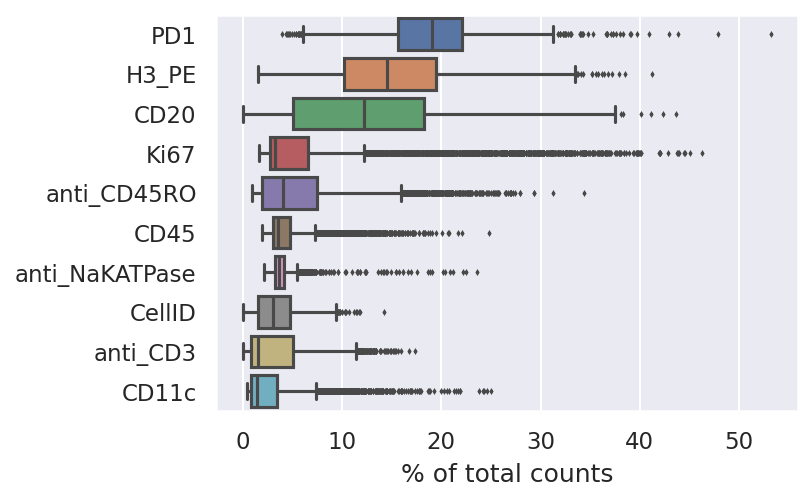

In [108]:
sc.pl.highest_expr_genes(adata, n_top=10, )

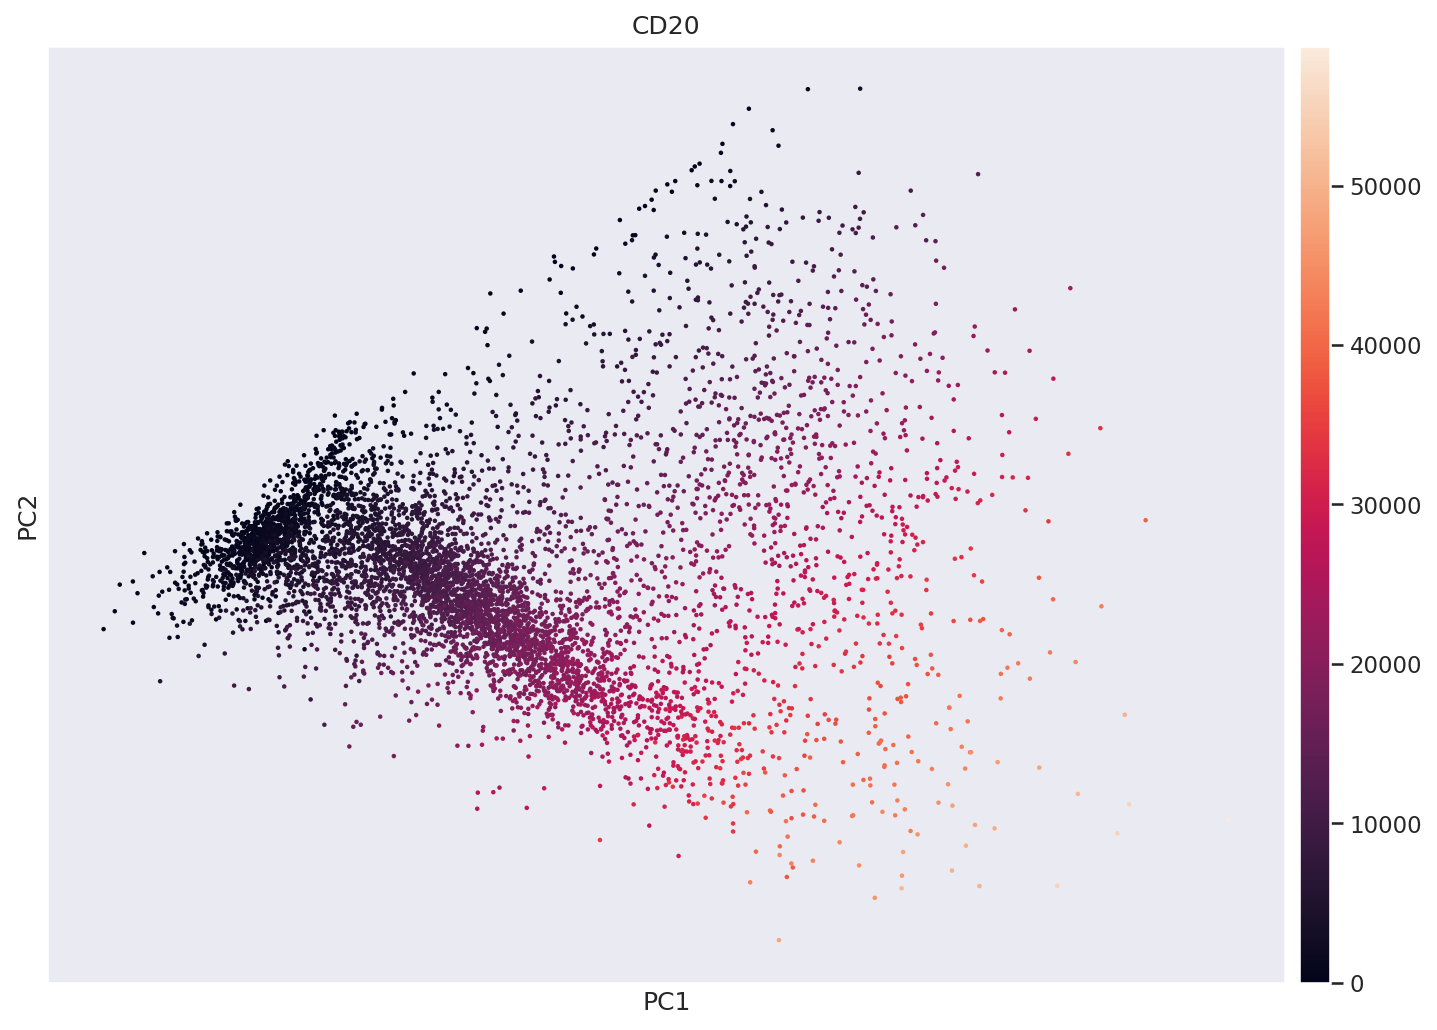

In [109]:
sc.tl.pca(adata, svd_solver='arpack') # peform PCA
sc.pl.pca(adata, color='CD20') # scatter plot in the PCA coordinates

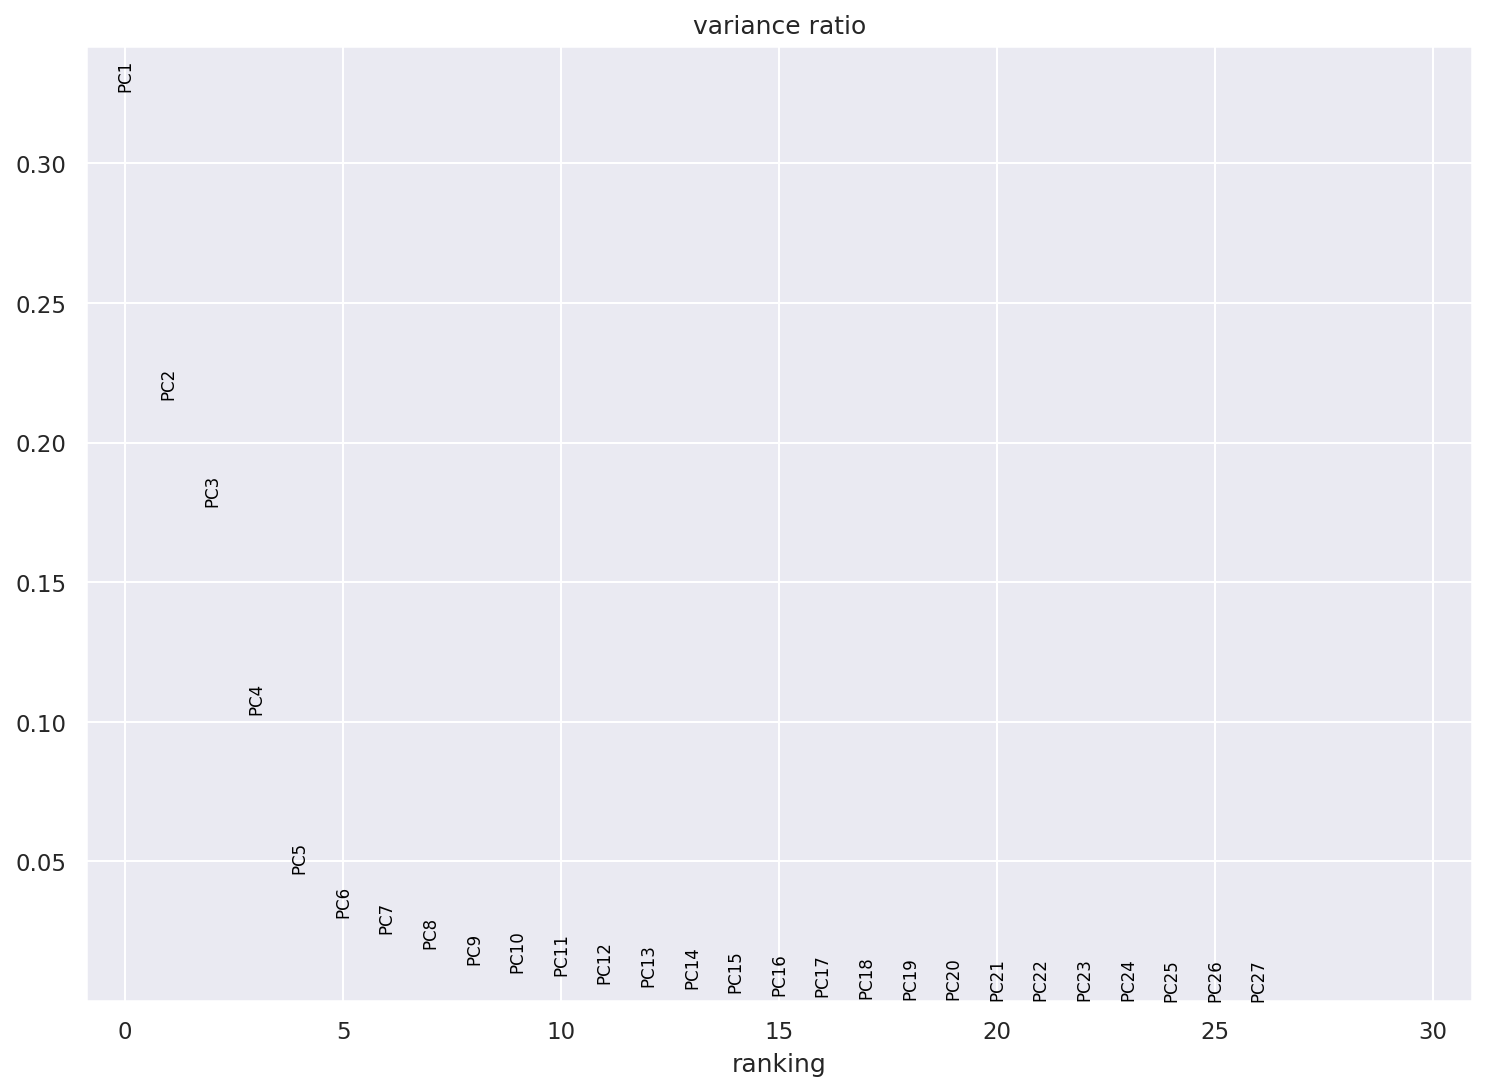

In [110]:
sc.pl.pca_variance_ratio(adata) # PCs to the total variance in the data

# Clustering and data exploration
You could use clustering and marker expression analysis within clusters to assign cell types similar to what is carried out with single-cell sequencing data.

In [111]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=10) # Computing the neighborhood graph

In [112]:
markers

['CellID',
 'A488',
 'A555',
 'A647',
 'anti_NaKATPase',
 'anti_CD3',
 'anti_CD45RO',
 'Ki67',
 'Keratin',
 'aSMA',
 'CD8a',
 'CD4',
 'CD45',
 'CD20',
 'CD11c',
 'PD1',
 'CD68',
 'FOXP3',
 'PDL1',
 'CD163',
 'H3_PE',
 'CD31',
 'Ecad',
 'Vimentin',
 'Catenin',
 'LaminAC',
 'pH3',
 'H2ax']

In [113]:
sc.tl.umap(adata) # Build a UMAP to visualize the neighbourhood graph

1. cluster the cells with surface markers: 
- B cell: cd20 and cd45
- T cell: cd3 / cd4/ cd8 /: cd4 and cd8 mutually exlusive, cd45
- macrophage: cd68
- Dendritic cell: cd11c
- nuclei: 'HistoneH3',
- activation: 'Ki67',


How does 'HistoneH3','Ki67' expression on cd11c positive cell vary as a function of proximity of T cells and B cells and Podoplanin



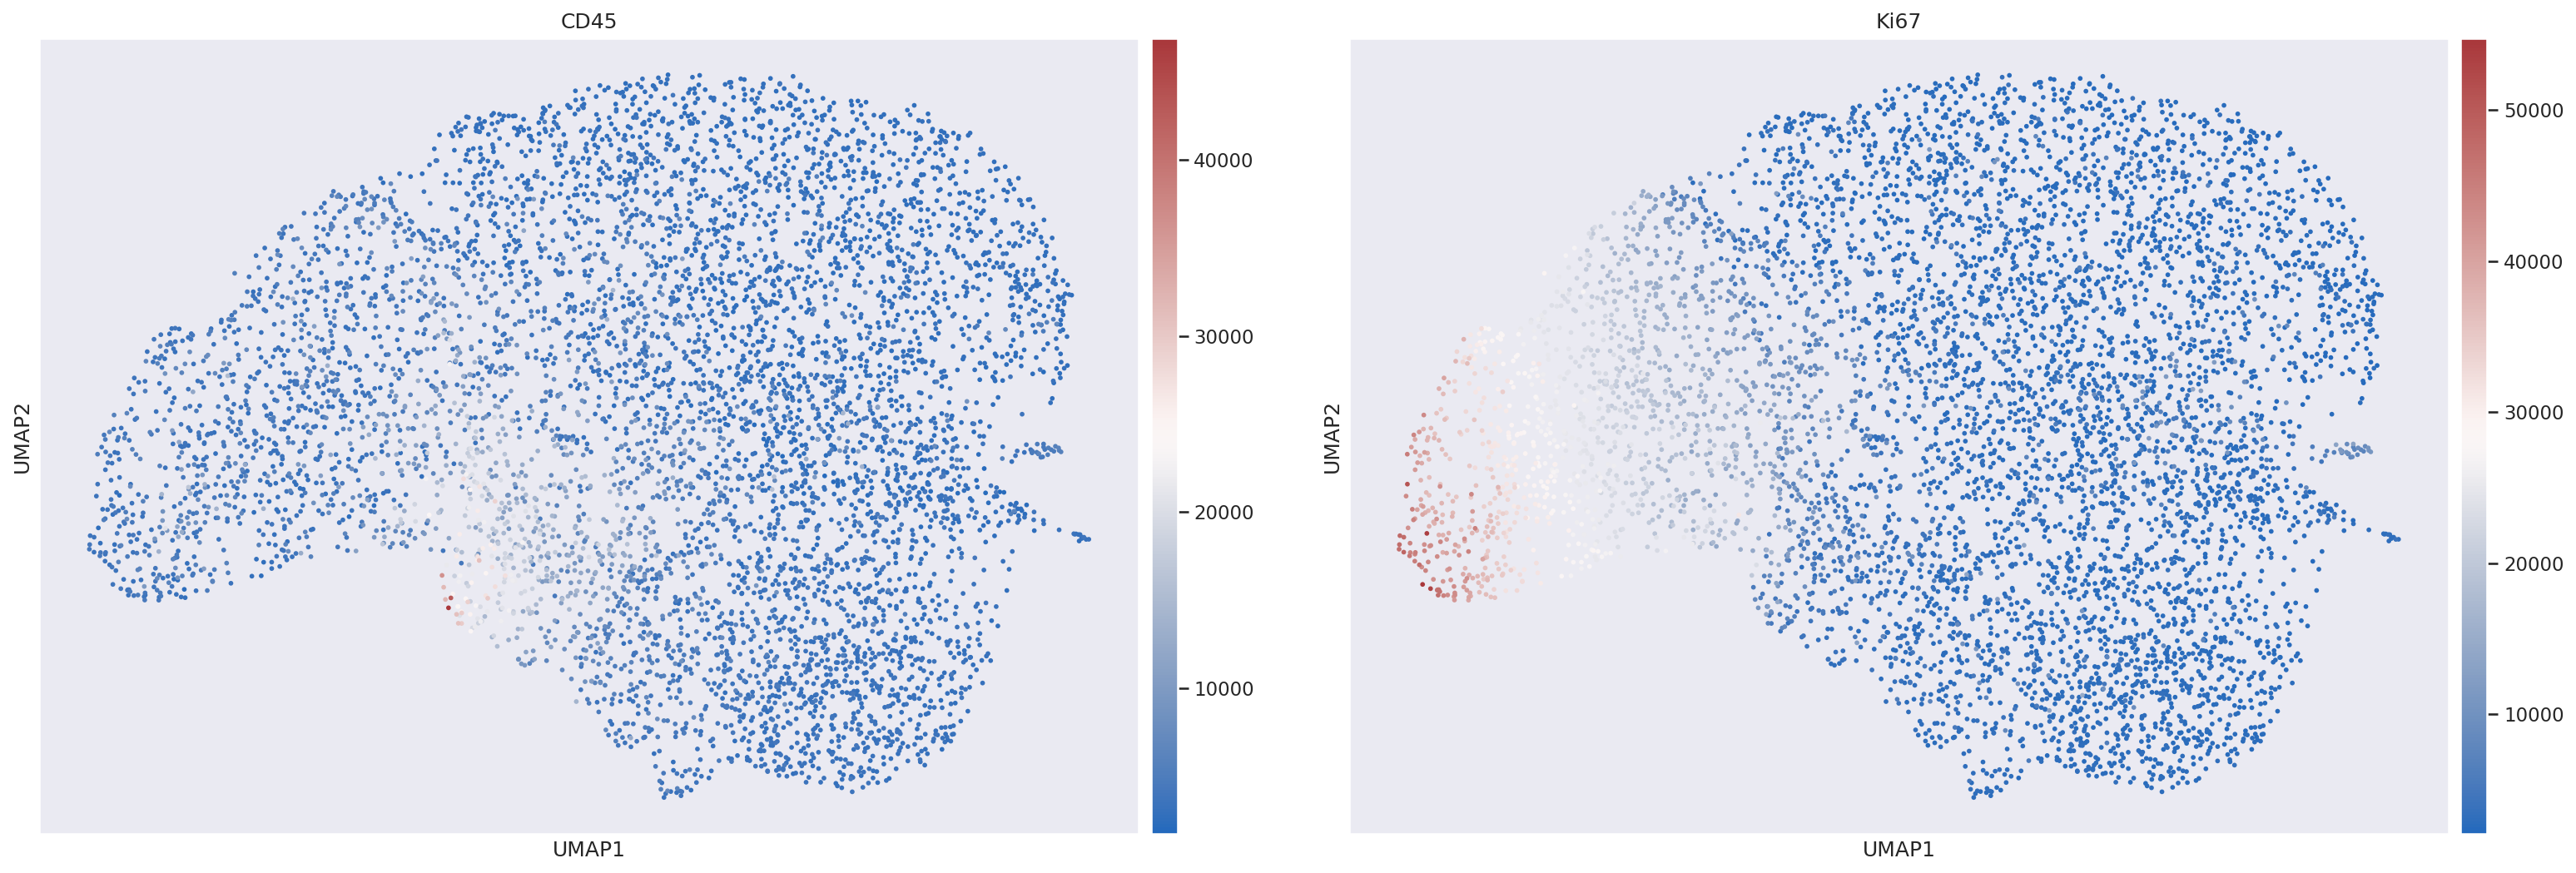

In [114]:
sc.pl.umap(adata, color=['CD45','Ki67'], cmap= 'vlag', use_raw=False, s=30) # Plot the UMAP

In [115]:
sc.tl.leiden(adata, resolution = 1) # Clustering the neighborhood graph

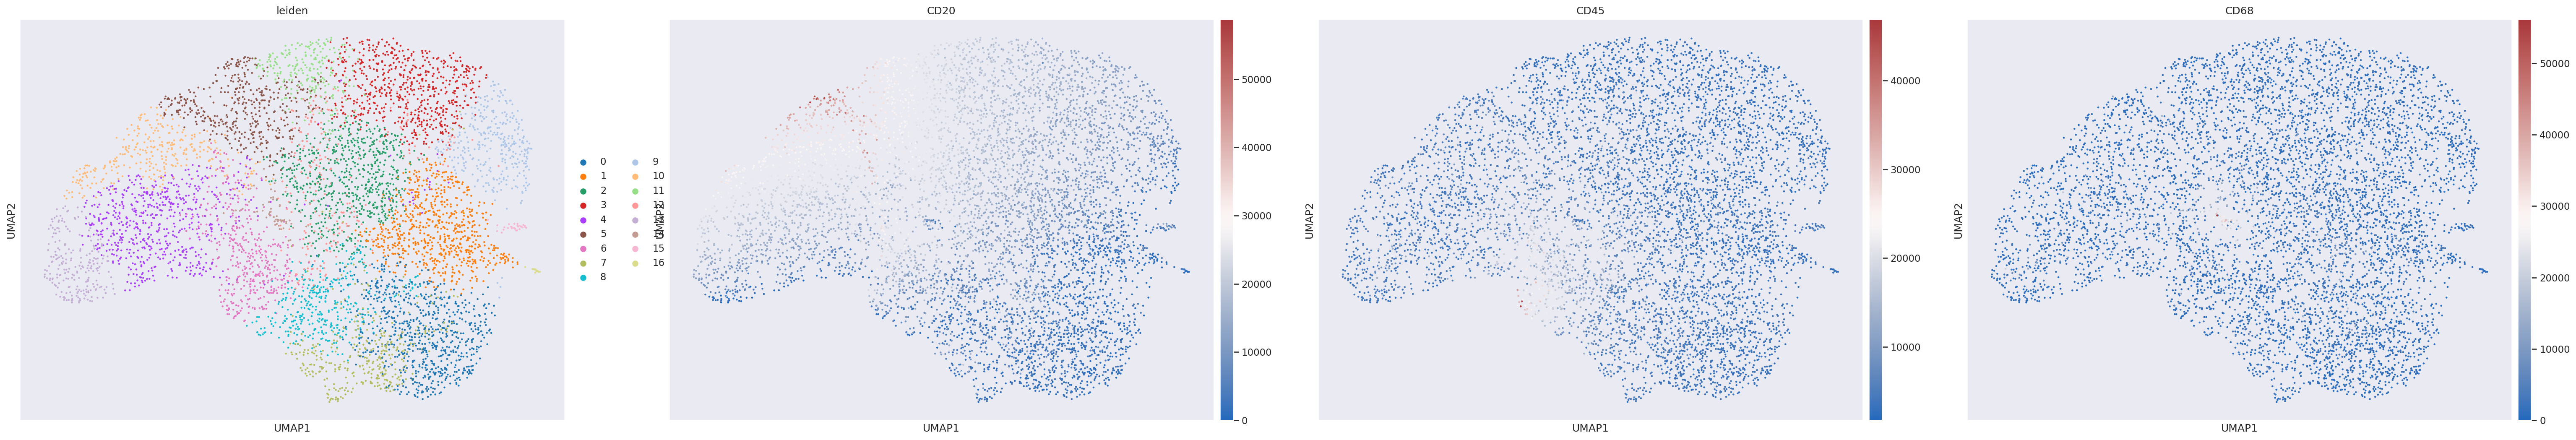

In [116]:
sc.pl.umap(adata, color=['leiden']+['CD20','CD45','CD68'],cmap= 'vlag', use_raw=False) # View the clustering  lovain

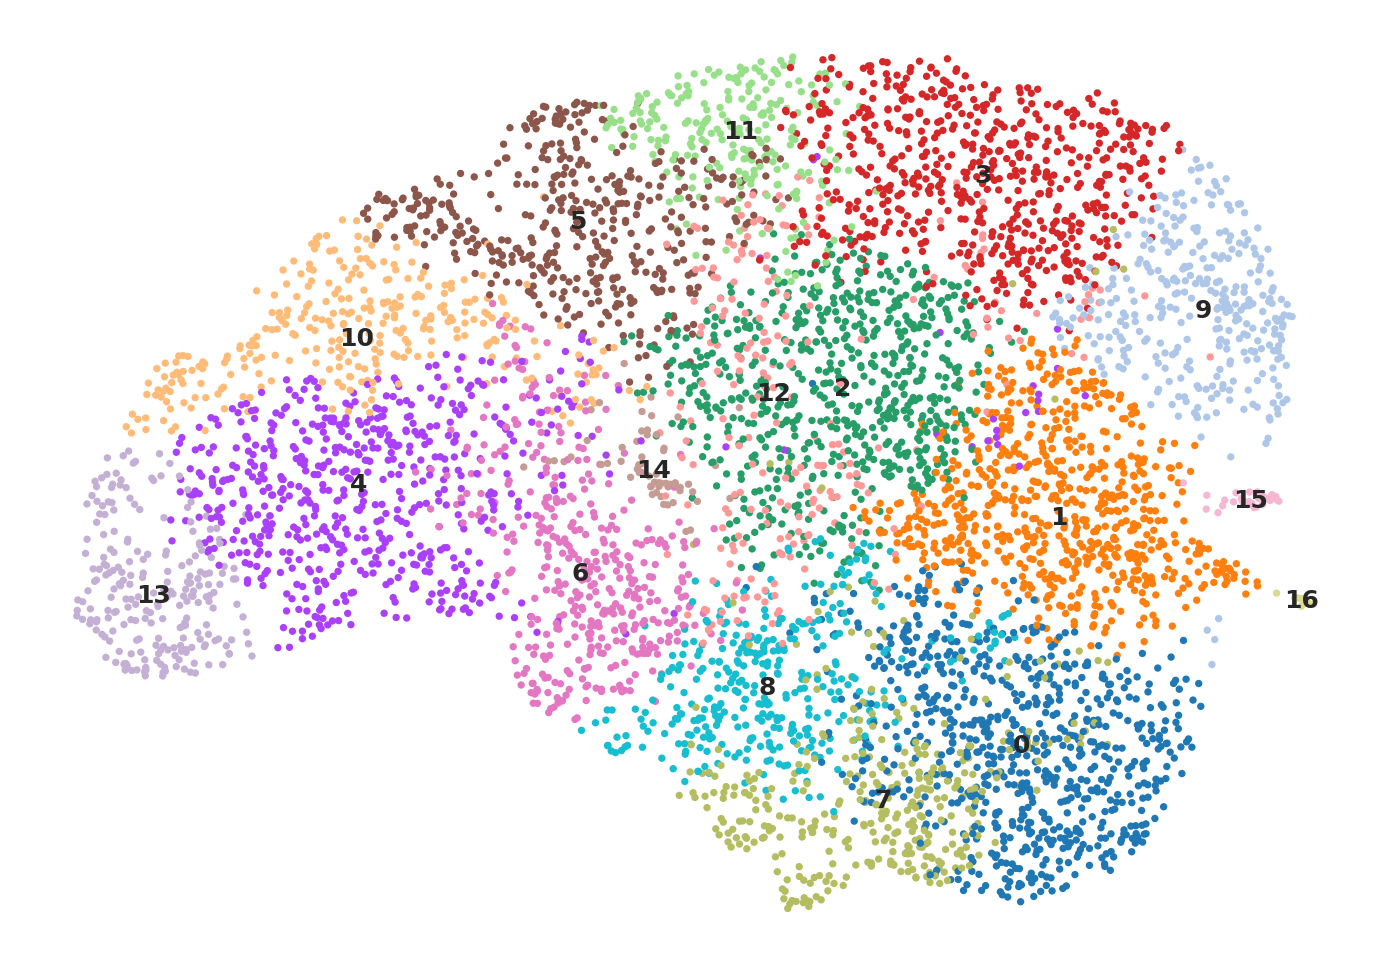

In [120]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sc.pl.umap(adata, color=['leiden'],legend_loc='on data', title='', frameon=False, s = 50) # View the clustering